In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

## MAKE A CNN


In [4]:
malta_loc_18 = '/Users/alex/Library/Mobile Documents/com~apple~CloudDocs/UWE/Masters/Group Project/Data/Malta-Budget-2018-dataset-v1.csv'
malta_loc_19 = '/Users/alex/Library/Mobile Documents/com~apple~CloudDocs/UWE/Masters/Group Project/Data/Malta-Budget-2019-dataset-v1.csv'
malta_loc_20 = '/Users/alex/Library/Mobile Documents/com~apple~CloudDocs/UWE/Masters/Group Project/Data/Malta-Budget-2020-dataset-v1.csv'

malta_data_18 = pd.read_csv(malta_loc_18)
malta_data_19 = pd.read_csv(malta_loc_19)
malta_data_20 = pd.read_csv(malta_loc_20)

In [8]:
malta_data_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Online Post ID          2142 non-null   int64  
 1   Twitter ID              1673 non-null   float64
 2   Related Online Post ID  333 non-null    float64
 3   Source ID               2142 non-null   object 
 4   Online Post Text        469 non-null    object 
 5   Subjectivity            2142 non-null   int64  
 6   Sentiment Polarity      2142 non-null   object 
 7   Emotion                 2142 non-null   object 
 8   Sarcasm                 2142 non-null   int64  
 9   Irony                   2142 non-null   int64  
 10  Negation                2142 non-null   int64  
 11  Off-topic               2142 non-null   int64  
 12  Language                2142 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 217.7+ KB


In [9]:
malta_data_19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Online Post ID          2316 non-null   int64  
 1   Twitter ID              1677 non-null   float64
 2   Related Online Post ID  448 non-null    float64
 3   Source ID               2316 non-null   object 
 4   Online Post Text        639 non-null    object 
 5   Subjectivity            2316 non-null   int64  
 6   Sentiment Polarity      2316 non-null   object 
 7   Emotion                 2316 non-null   object 
 8   Sarcasm                 2316 non-null   int64  
 9   Irony                   2316 non-null   int64  
 10  Negation                2316 non-null   int64  
 11  Off-topic               2316 non-null   int64  
 12  Language                2316 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 235.3+ KB


In [10]:
malta_data_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929 entries, 0 to 1928
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Online Post ID          1929 non-null   int64  
 1   Twitter ID              1314 non-null   float64
 2   Related Online Post ID  396 non-null    float64
 3   Source ID               1929 non-null   object 
 4   Online Post Text        615 non-null    object 
 5   Subjectivity            1929 non-null   int64  
 6   Sentiment Polarity      1929 non-null   object 
 7   Emotion                 1929 non-null   object 
 8   Sarcasm                 1929 non-null   int64  
 9   Irony                   1929 non-null   int64  
 10  Negation                1929 non-null   int64  
 11  Off-topic               1929 non-null   int64  
 12  Language                1929 non-null   int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 196.0+ KB


In [11]:
malta_data_18.head()

,Online Post ID,Twitter ID,Related Online Post ID,Source ID,Online Post Text,Subjectivity,Sentiment Polarity,Emotion,Sarcasm,Irony,Negation,Off-topic,Language
0,20180001,NaN,NaN,N-1-2018,Great BUDGET . Even cigarettes were not touche...,1,positive,trust,0,0,1,0,0
1,20180002,NaN,20180001.0,N-1-2018,I haven't exactly scanned the budget throughou...,1,negative,disgust,0,0,1,0,0
2,20180003,NaN,20180002.0,N-1-2018,There’s already smoking cessation programs for...,1,neutral,anticipation,0,0,0,0,0
3,20180004,NaN,20180003.0,N-1-2018,So should alcohol and fuel for private vehicle...,1,negative,sadness,0,0,0,0,0
4,20180005,NaN,20180004.0,N-1-2018,Practical? You should say that in a third worl...,1,negative,anger,0,0,1,0,0


In [12]:
malta_data_19.head()

,Online Post ID,Twitter ID,Related Online Post ID,Source ID,Online Post Text,Subjectivity,Sentiment Polarity,Emotion,Sarcasm,Irony,Negation,Off-topic,Language
0,20190001,NaN,NaN,N-1-2019,Does that mean that if my home rent doubled in...,1,negative,sadness,0,1,0,0,0
1,20190002,NaN,20190001.0,N-1-2019,Of course he will. And he'll get every landlor...,1,negative,anger,0,1,0,0,0
2,20190003,NaN,20190001.0,N-1-2019,"Typical entitlement, benefit-seeking mentality...",1,positive,disgust,0,0,0,1,0
3,20190004,NaN,20190003.0,N-1-2019,What are you talking about? Everything has inc...,1,negative,anticipation,0,1,0,0,0
4,20190005,NaN,20190004.0,N-1-2019,"Forget the spin, I've had more than my fair sh...",1,positive,trust,0,0,0,1,0


In [13]:
malta_data_20.head()

,Online Post ID,Twitter ID,Related Online Post ID,Source ID,Online Post Text,Subjectivity,Sentiment Polarity,Emotion,Sarcasm,Irony,Negation,Off-topic,Language
0,20200001,NaN,NaN,N-1-2020,"""the problems the Labour government had first ...",1,negative,disgust,1,0,1,0,0
1,20200002,NaN,20200001.0,N-1-2020,Yes any problems that they may have inherited ...,1,negative,sadness,0,0,0,0,0
2,20200003,NaN,20200002.0,N-1-2020,One of them is the total obliteration of the P...,1,negative,anger,0,0,0,1,0
3,20200004,NaN,20200003.0,N-1-2020,Is that the best you can come up with.,1,neutral,surprise,0,1,0,1,0
4,20200005,NaN,20200003.0,N-1-2020,"Isn't worrying you, your stutter is getting wo...",1,negative,disgust,0,0,1,1,0


In [20]:
malta_data_18["Emotion"].value_counts()

Emotion
joy             930
anticipation    618
trust           184
disgust         178
anger           131
sadness          46
surprise         42
fear             13
Name: count, dtype: int64

<Axes: >

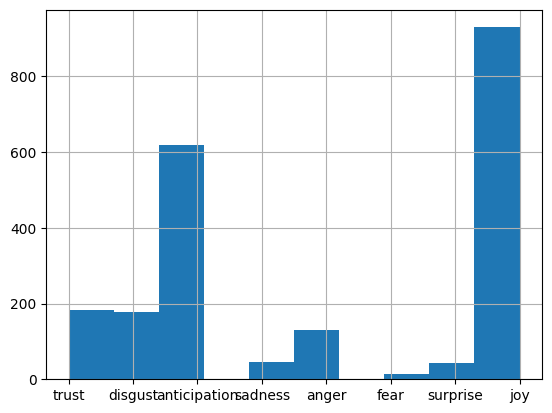

In [21]:
malta_data_18["Emotion"].hist()

<Axes: >

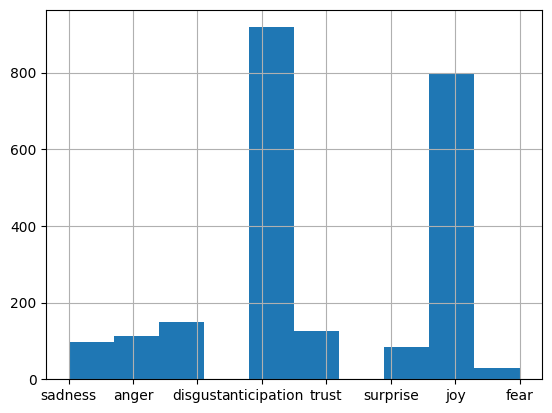

In [17]:
malta_data_19["Emotion"].value_counts()
malta_data_19["Emotion"].hist()

<Axes: >

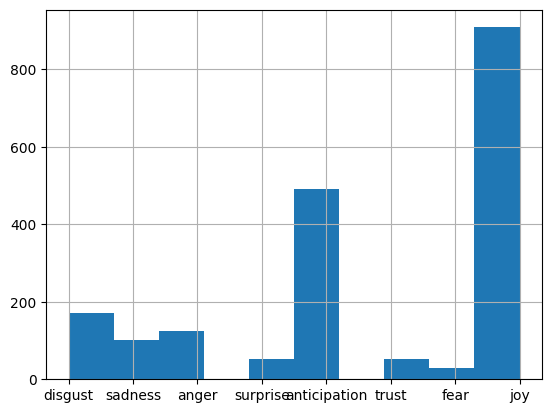

In [23]:
malta_data_20["Emotion"].value_counts()
malta_data_20["Emotion"].hist()

In [28]:
combined_data = pd.concat([malta_data_18, malta_data_19, malta_data_20], ignore_index=True)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6387 entries, 0 to 6386
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Online Post ID          6387 non-null   int64  
 1   Twitter ID              4664 non-null   float64
 2   Related Online Post ID  1177 non-null   float64
 3   Source ID               6387 non-null   object 
 4   Online Post Text        1723 non-null   object 
 5   Subjectivity            6387 non-null   int64  
 6   Sentiment Polarity      6387 non-null   object 
 7   Emotion                 6387 non-null   object 
 8   Sarcasm                 6387 non-null   int64  
 9   Irony                   6387 non-null   int64  
 10  Negation                6387 non-null   int64  
 11  Off-topic               4071 non-null   float64
 12  Language                6387 non-null   int64  
 13  Off-topic               2316 non-null   float64
dtypes: float64(4), int64(6), object(4)
memor

In [57]:
clean_data = combined_data.dropna(subset=['Online Post Text'])
clean_data = clean_data.drop(['Twitter ID', 'Related Online Post ID', 'Source ID','Off-topic', 'Off-topic '], axis=1)
clean_data = clean_data[clean_data['Language'] == 0]
clean_data = clean_data.drop(['Language'], axis=1)
clean_data = clean_data.rename(columns={'Online Post ID':'ID','Online Post Text':'Text'})
clean_data.head()

,ID,Text,Subjectivity,Sentiment Polarity,Emotion,Sarcasm,Irony,Negation
0,20180001,Great BUDGET . Even cigarettes were not touche...,1,positive,trust,0,0,1
1,20180002,I haven't exactly scanned the budget throughou...,1,negative,disgust,0,0,1
2,20180003,There’s already smoking cessation programs for...,1,neutral,anticipation,0,0,0
3,20180004,So should alcohol and fuel for private vehicle...,1,negative,sadness,0,0,0
4,20180005,Practical? You should say that in a third worl...,1,negative,anger,0,0,1


In [55]:
clean_data["Emotion"].value_counts()

Emotion
disgust         253
anger           225
anticipation    199
sadness         138
joy              95
surprise         92
trust            67
fear             45
Name: count, dtype: int64

/var/folders/lx/s6mpvqt1305650xxj6d7yfj80000gn/T/ipykernel_57593/1873730629.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


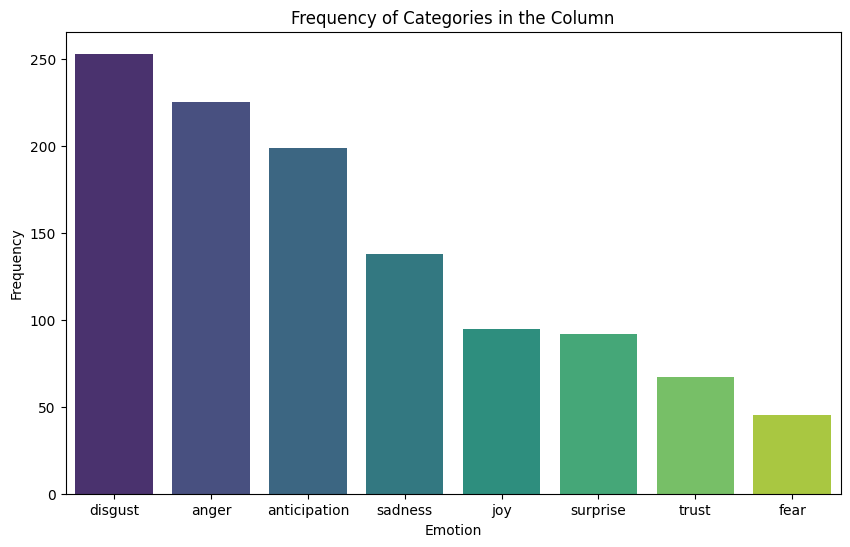

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

value_counts = clean_data['Emotion'].value_counts()

# Plotting the frequency of string values in the 'Category' column
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Frequency of Categories in the Column')
plt.show()

In [58]:
import string
import re
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import contractions

def remove_special_characters(text):
    pattern = re.compile(r'[^a-zA-Z\s]')
    return pattern.sub('', text)

# Remove URLs and HTML tags
clean_data['Text'] = clean_data['Text'].str.replace(r'http\S+|www\S+|https\S+', '', regex=True)
clean_data['Text'] = clean_data['Text'].str.replace(r'<.*?>', '', regex=True)

# Expand contractions
clean_data['Text'] = clean_data['Text'].apply(lambda x: contractions.fix(x))

# Convert to lowercase
clean_data['Text'] = clean_data['Text'].str.lower()

# Remove punctuation
clean_data['Text'] = clean_data['Text'].str.replace(f"[{string.punctuation}]", " ", regex=True)

# Remove numbers
clean_data['Text'] = clean_data['Text'].str.replace(r'\d+', '', regex=True)

# Remove special characters
clean_data['Text'] = clean_data['Text'].apply(remove_special_characters)

# Remove stop words
stop_words = set(stopwords.words('english'))
clean_data['Text'] = clean_data['Text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Remove extra whitespace
clean_data['Text'] = clean_data['Text'].str.strip()
clean_data['Text'] = clean_data['Text'].str.replace(r'\s+', ' ', regex=True)

# Lemmatize
lemmatizer = WordNetLemmatizer()
clean_data['Text'] = clean_data['Text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))

# Tokenize
# clean_data['tokens'] = clean_data['Text'].apply(word_tokenize)
 
clean_data.head()

[nltk_data] Downloading package wordnet to /Users/alex/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,ID,Text,Subjectivity,Sentiment Polarity,Emotion,Sarcasm,Irony,Negation
0,20180001,great budget even cigarette touched great work...,1,positive,trust,0,0,1
1,20180002,exactly scanned budget throughout earth make i...,1,negative,disgust,0,0,1
2,20180003,already smoking cessation program people want ...,1,neutral,anticipation,0,0,0
3,20180004,alcohol fuel private vehicle raising tax cigar...,1,negative,sadness,0,0,0
4,20180005,practical say third world country supposed eur...,1,negative,anger,0,0,1


In [59]:
stripped_data = clean_data.drop(columns=['Subjectivity','Sentiment Polarity', 'Sarcasm','Irony','Negation'])
stripped_data.head()

,ID,Text,Emotion
0,20180001,great budget even cigarette touched great work...,trust
1,20180002,exactly scanned budget throughout earth make i...,disgust
2,20180003,already smoking cessation program people want ...,anticipation
3,20180004,alcohol fuel private vehicle raising tax cigar...,sadness
4,20180005,practical say third world country supposed eur...,anger


In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

train_df, test_df = train_test_split(stripped_data, test_size=0.2, stratify=stripped_data['Emotion'], random_state=42)

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['Text'])
X_test = vectorizer.transform(test_df['Text'])

# Labels
y_train = train_df['Emotion']
y_test = test_df['Emotion']

# Training Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicting on test data
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.28699551569506726
Classification Report:
               precision    recall  f1-score   support

       anger       0.19      0.31      0.24        45
anticipation       0.43      0.45      0.44        40
     disgust       0.32      0.51      0.39        51
        fear       0.50      0.11      0.18         9
         joy       0.00      0.00      0.00        19
     sadness       0.29      0.18      0.22        28
    surprise       0.00      0.00      0.00        18
       trust       0.00      0.00      0.00        13

    accuracy                           0.29       223
   macro avg       0.22      0.20      0.18       223
weighted avg       0.25      0.29      0.25       223



In [94]:
import string
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.layers import GlobalAveragePooling2D, MaxPooling2D, Conv2D
# Tokenization and Padding
max_features = 1000  # Max number of words in tokenizer
max_len = 100  # Max length of each sequence (pad/truncate to this length)
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(stripped_data['Text'])
sequences = tokenizer.texts_to_sequences(stripped_data['Text'])
x_data = pad_sequences(sequences, maxlen=max_len)
y_data = pd.get_dummies(stripped_data['Emotion']).values  # Convert categorical labels to one-hot encoded vectors

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
print('Shape of training data: ')
print(X_train.shape)
print(y_train.shape)
print('Shape of test data: ')
print(X_test.shape)
print(y_test.shape)


# CNN Model Architecture
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim))  # Specify input_dim instead of input_length
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y_data.shape[1], activation='softmax'))  # Output layer with softmax activation for multi-class classification

# embedding_dim = 100
# model = Sequential()
# model.add(Embedding(input_dim=max_features, output_dim=embedding_dim))  # Specify input_dim instead of input_length
# model.add(Conv2D(128, 5, activation='relu'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Conv2D(128, 5, activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv2D(128, 5, activation='relu'))
# model.add(GlobalAveragePooling2D())
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(y_data.shape[1], activation='softmax')) 


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Training the model
batch_size = 32
epochs = 10
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Shape of training data: 
(891, 100)
(891, 8)
Shape of test data: 
(223, 100)
(223, 8)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_11         │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2382 - loss: 2.0280 - val_accuracy: 0.2242 - val_loss: 1.9289
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2505 - loss: 1.9083 - val_accuracy: 0.2242 - val_loss: 1.9300
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.2586 - loss: 1.8856 - val_accuracy: 0.2242 - val_loss: 1.9188
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3037 - loss: 1.8073 - val_accuracy: 0.2556 - val_loss: 1.9205
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4892 - loss: 1.6753 - val_accuracy: 0.2870 - val_loss: 1.8902
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6155 - loss: 1.4248 - val_accuracy: 0.2870 - val_loss: 1.8812
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7077 - loss: 1.0887 - val_accuracy: 0.2870 - val_loss: 1.9273
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7835 - loss: 0.7961 - val_accuracy: 0.2915 - v

[False False False False False False False  True] [False False  True False False False False False] [False  True False False False False False False] [False False False False False  True False False] [ True False False False False False False False] [False False False False False False False  True] [False False False False False False False  True] [False False  True False False False False False] [ True False False False False False False False] [False False False False False  True False False] [False  True False False False False False False] [False  True False False False False False False] [False  True False False False False False False] [False  True False False False False False False] [ True False False False False False False False] [False  True False False False False False False] [False  True False False False False False False] [False False  True False False False False False] [False  True False False False False False False] [False  True False False False False False False] 